# Link to the dataset :
https://www.kaggle.com/datasets/heidarmirhajisadati/regional-cost-of-living-analysis

# The imports 

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

# Loading the dataset 

In [4]:
# Load the dataset
df = pd.read_csv('Cost_of_Living_and_Income_Extended.csv')

# Consultation

In [5]:
df.head(2)

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013,3483.92,1106.07,32.09,27.5,1.74,18.23,6.94,17.19,Oceania
1,India,2019,7771.03,5422.78,25.21,29.3,3.35,17.21,12.42,9.90,Asia


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Average_Monthly_Income          500 non-null    float64
 3   Cost_of_Living                  500 non-null    float64
 4   Housing_Cost_Percentage         500 non-null    float64
 5   Tax_Rate                        500 non-null    float64
 6   Savings_Percentage              500 non-null    float64
 7   Healthcare_Cost_Percentage      500 non-null    float64
 8   Education_Cost_Percentage       500 non-null    float64
 9   Transportation_Cost_Percentage  500 non-null    float64
 10  Region                          500 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.1+ KB


In [9]:
df.describe()

,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2011.514000,4291.248240,3716.23212,34.973700,22.400900,14.92708,12.381820,8.408440,12.475940
std,7.018284,2179.217333,1922.16053,8.657032,10.025412,8.81321,4.269823,3.775455,4.219147
min,2000.000000,534.740000,432.60000,20.100000,5.000000,0.00000,5.010000,2.000000,5.060000
25%,2005.000000,2322.360000,1967.79000,27.235000,14.742500,7.52500,8.487500,5.285000,8.752500
50%,2012.000000,4391.585000,3803.20500,35.170000,22.275000,14.95000,12.365000,8.245000,12.665000
75%,2018.000000,6233.757500,5265.96750,42.567500,30.905000,22.42750,16.222500,11.595000,15.952500
max,2023.000000,7984.510000,6996.13000,49.950000,39.920000,29.84000,19.990000,14.940000,19.970000


In [10]:
df.isnull().sum()

Country                           0
Year                              0
Average_Monthly_Income            0
Cost_of_Living                    0
Housing_Cost_Percentage           0
Tax_Rate                          0
Savings_Percentage                0
Healthcare_Cost_Percentage        0
Education_Cost_Percentage         0
Transportation_Cost_Percentage    0
Region                            0
dtype: int64

# Storing the categorical <br> and the numerical columns name

In [ ]:
categorical_features = ['Country', 'Region']
numerical_features = ['Year', 'Cost_of_Living', 'Housing_Cost_Percentage',
                      'Tax_Rate', 'Savings_Percentage',
                      'Healthcare_Cost_Percentage', 'Education_Cost_Percentage',
                      'Transportation_Cost_Percentage']

# Plotting the heat map or numerical features

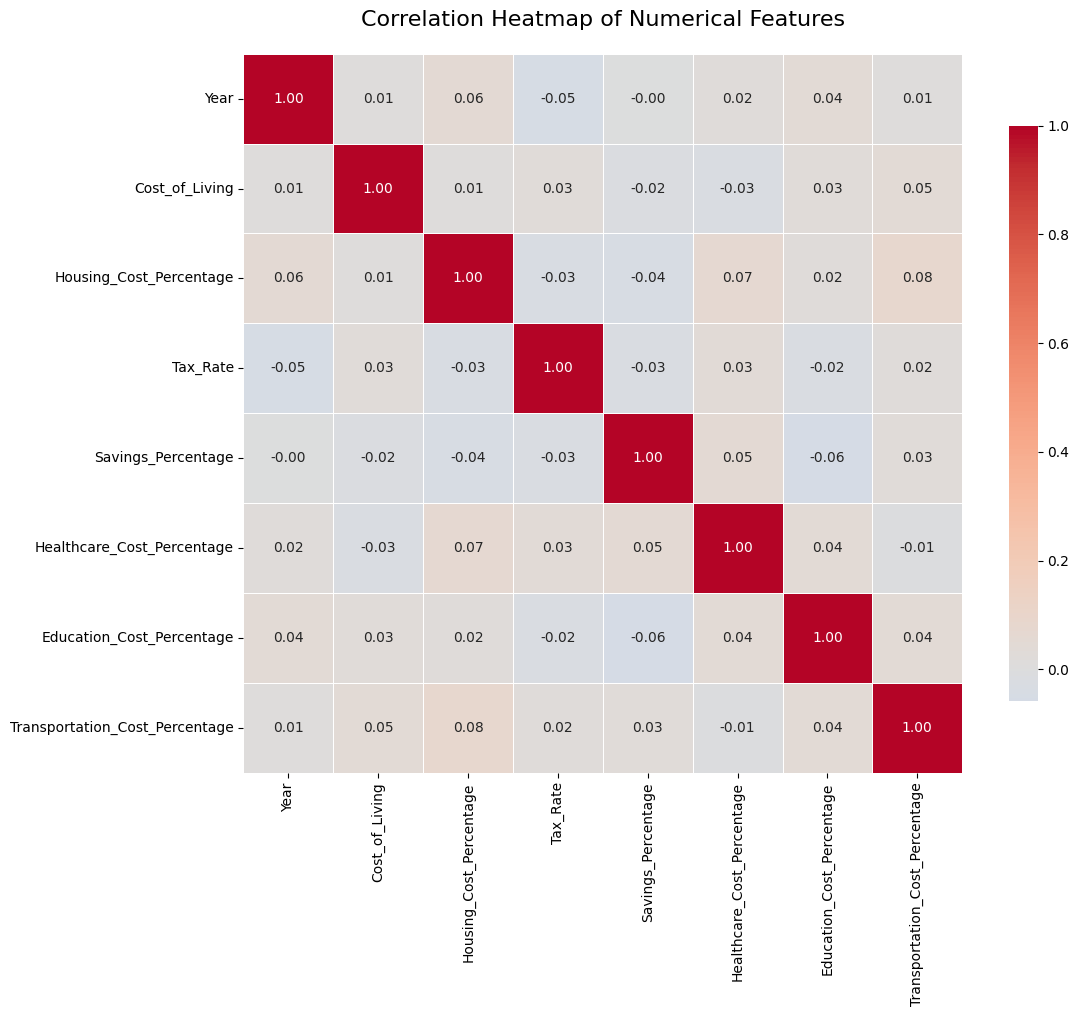

In [ ]:
def plot_numerical_features_heatmap(df, numerical_features):
    """
    Create a correlation heatmap for numerical features.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame containing the data
    numerical_features : list
        List of numerical feature column names
    """
    # Create a correlation matrix
    correlation_matrix = df[numerical_features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # Create the heatmap using seaborn
    sns.heatmap(
        correlation_matrix, 
        annot=True,  # Show correlation values
        cmap='coolwarm',  # Color map (blue for negative, red for positive correlations)
        center=0,  # Center the colormap at 0
        square=True,  # Make the plot square
        linewidths=0.5,  # Add lines between cells
        cbar_kws={"shrink": .8},  # Slightly shrink the colorbar
        fmt=".2f"  # Format correlation values to 2 decimal places
    )
    
    # Set the title
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16, pad=20)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_numerical_features_heatmap(df, numerical_features)

# Train , Evaluation and saving the <br>pipeline of the best model

In [ ]:
# Define features and target
features = ['Year', 'Cost_of_Living', 'Housing_Cost_Percentage', 'Tax_Rate',
            'Savings_Percentage', 'Healthcare_Cost_Percentage',
            'Education_Cost_Percentage', 'Transportation_Cost_Percentage',
            'Region', 'Country']
target = 'Average_Monthly_Income'

X = df[features]
y = df[target]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Create pipelines for different models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', DecisionTreeRegressor())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor())]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', GradientBoostingRegressor())])
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
best_model = None
best_score = -np.inf

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}')
    if r2 > best_score:
        best_score = r2
        best_model = model

# Save the best model with scalers and encoders
joblib.dump(best_model, 'best_model.pkl')

Linear Regression - RMSE: 2069.76, MAE: 1733.44, R²: -0.02
Decision Tree - RMSE: 3057.61, MAE: 2565.89, R²: -1.23
Random Forest - RMSE: 2059.60, MAE: 1762.02, R²: -0.01
Gradient Boosting - RMSE: 2160.80, MAE: 1830.42, R²: -0.12


['best_model.pkl']